In [19]:
import sys
import os
sys.path.insert(0, "../")
import apple_pie as ap

import apple_pie as ap
import brutils as br


from matplotlib import pyplot as plt
import numpy as np
from IPython.display import display as idisp
%matplotlib notebook

from matplotlib.widgets import Button

well_file = '/Volumes/baylieslab/Current Lab Members/Whitney/Rhabdo Project/Tissue Culture/Timelapse/Rhabdomyosarcoma plate movies/Post-mycoplasma data (starting 9:18:18)/RH30/18-11-07.rht/Csv/B02.csv'

well_name = 'B02'

w = ap.Well('exper',well_name,well_file)

cd_tic = br.dtic('create_dists one well')
w.create_dists()

In [20]:
grouped = w.cdf.groupby(ap.hdings.T_ID)

In [46]:
class Butts(object) :
    
    def __init__(self, grouped) :
        self.grouped = grouped
        self.groups = list(grouped.groups.keys())
        self.ind = 0
        
        
        self.fig = plt.figure()
        
#         self.l, = self.cur_group().plot(x=ap.hdings.FRAME,y=ap.hdings.DIST, kind="scatter")
        #self.l, = plt.plot(self.cur_group()[ap.hdings.FRAME],self.cur_group()[ap.hdings.DIST], 'bo')
        self.ax = plt.gca()
        plt.plot(self.cur_group()[ap.hdings.FRAME],self.cur_group()[ap.hdings.DIST], 'bo')

        

    def next(self, event) :
#         print('next')
        self.ind += 1
        for i, line in enumerate(self.ax.lines):
            self.ax.lines.pop(i)
            line.remove()
        self.ax.plot(self.cur_group()[ap.hdings.FRAME],self.cur_group()[ap.hdings.DIST],'bo')

#         self.plot2()
        
    def prev(self, event) :
#         print('prev')
        self.ind -= 1
        self.ax.plot(self.cur_group()[ap.hdings.FRAME],self.cur_group()[ap.hdings.DIST],'bo')

        self.plot2()
        
        

    def plot2(self) :
#         self.ax.set_ylim(0,10)
        self.ax.plot(self.cur_group()[ap.hdings.FRAME],self.cur_group()[ap.hdings.DIST],'bo')
#         plt.draw()
        #self.l.set_xdata(self.cur_group()[ap.hdings.FRAME])
        #self.l.set_ydata(self.cur_group()[ap.hdings.DISTANCE])
        #plt.draw()
        #self.fig.canvas.draw()
        #self.fig.canvas.flush_events()

    def cur_group(self) :
        print(self.groups[self.ind])
        return self.grouped.get_group(self.groups[self.ind])
        

<IPython.core.display.Javascript object>


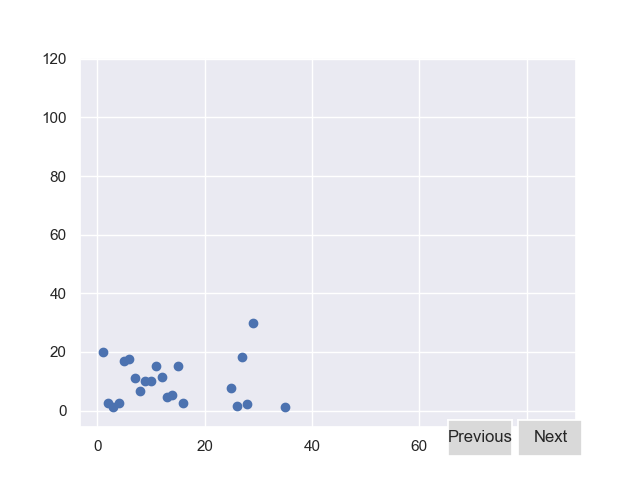

1
1


0

In [47]:
grouped = w.cdf.groupby(ap.hdings.T_ID)

gb = Butts(grouped)

# fig, ax = plt.subplots()
# plt.subplots_adjust(bottom=0.2)

axprev = plt.axes([0.7, 0.05, 0.1, 0.075])
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(gb.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(gb.prev)



In [30]:
gb.ind

3

In [40]:
gb.plot2()

5
5


<IPython.core.display.Javascript object>


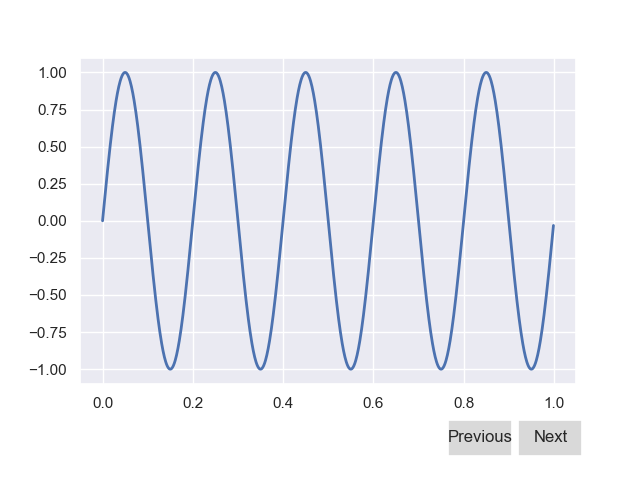

In [10]:
%matplotlib notebook
from IPython.display import display as idisp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = plt.plot(t, s, lw=2)


class Index(object):
    ind = 0

    def next(self, event):
        self.ind += 1
        idisp('next')
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        idisp('prev')
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

callback = Index()
axprev = plt.axes([0.7, 0.05, 0.1, 0.075])
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()